# Exploratory data analysis in Pandas.

**Initial steps:**

1. Import required libraries.

2. Load the data.

3. Detecting Outliers.

4. DataFrame info.

5. Descriptive Statistical Analysis.

6. Check for correlations.

7. Plot features.

8. Group by.

9. ANOVA: Analysis of Variance.

## 1. Import required libraries.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Load the data.

In [36]:
# Import data from csv to a Pandas DataFrame

df = pd.read_csv('Data/Cars_CleanData.csv')
df.head()

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
0,Subaru,2,hatchback,four,0.297546,9.0,69,4900,31,36,5118.0,Low,0,1
1,Chevrolet,2,hatchback,three,0.187117,9.5,48,5100,47,53,5151.0,Low,0,1
2,Mazda,2,hatchback,four,0.279141,9.0,68,5000,30,31,5195.0,Low,0,1
3,Toyota,2,hatchback,four,0.282209,9.0,62,4800,35,39,5348.0,Low,0,1
4,Mitsubishi,2,hatchback,four,0.282209,9.4,68,5500,37,41,5389.0,Low,0,1


In [37]:
# Check for null values.
print('Null fields in each column:\n')
print(df.isnull().sum())

Null fields in each column:

Make                 0
Doors                0
Body style           0
Num of cylinders     0
Engine size          0
Compression ratio    0
Horsepower           0
Peak rpm             0
City mpg             0
Highway mpg          0
Price                0
Horsepower binned    0
Diesel               0
Gas                  0
dtype: int64


## 3. Detecting Outliers

Outliers can lead to less accurate models, hence it's a good idea to find them and evaluate if it is convenient to remove them. With box plots the IQR (InterQuartile Range) can be visualized. Points outside the box are outliers. 

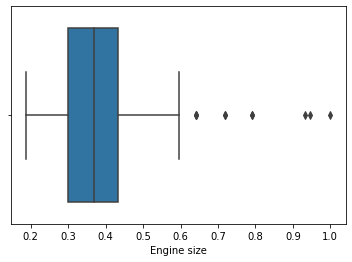

In [38]:
sns.boxplot(x=df['Engine size'])

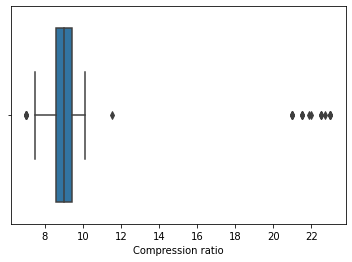

In [39]:
sns.boxplot(x=df['Compression ratio'])

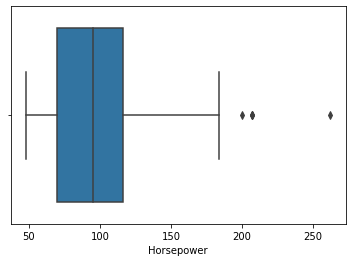

In [40]:
sns.boxplot(x=df['Horsepower'])

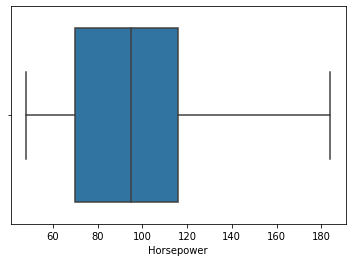

In [41]:
# Removal of Horsepower outliers
df = df[df['Horsepower']<190]
sns.boxplot(x=df['Horsepower'])

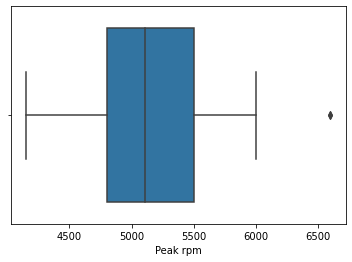

In [42]:
sns.boxplot(x=df['Peak rpm'])

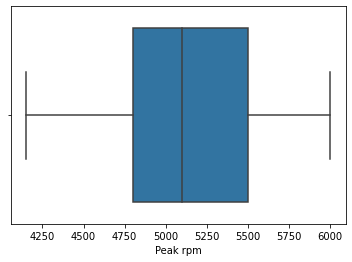

In [43]:
# Removal of Peak rpm outliers
df = df[df['Peak rpm']<6500]
sns.boxplot(x=df['Peak rpm'])

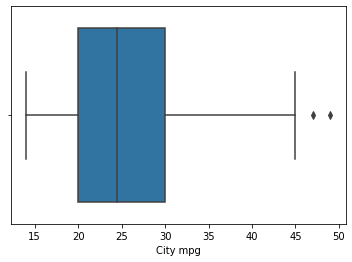

In [44]:
sns.boxplot(x=df['City mpg'])

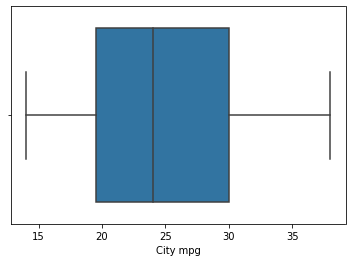

In [45]:
# Removal of city mpg outliers
df = df[df['City mpg']<45]
sns.boxplot(x=df['City mpg'])

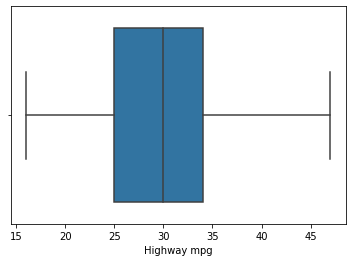

In [46]:
sns.boxplot(x=df['Highway mpg'])

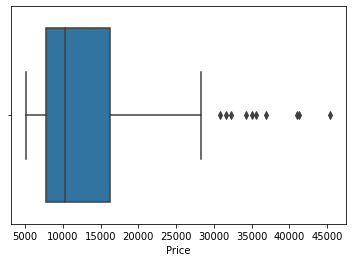

In [47]:
sns.boxplot(x=df['Price'])

A more automatized method is the following:

In [48]:
df.shape

(191, 14)

In [49]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Doors                   2.000000
Engine size             0.133436
Compression ratio       0.900000
Horsepower             46.000000
Peak rpm              700.000000
City mpg               10.500000
Highway mpg             9.000000
Price                8432.500000
Diesel                  0.000000
Gas                     0.000000
dtype: float64


In [50]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(157, 14)

34 rows were removed. This method removes rows which values are below 1.5 IQR below Q1 (range from minimum to 25% of the values) or above Q3 (range from minimum to 75% of the values).

## 4. DataFrame info.

In [51]:
# Extract headers titles
df.columns

Index(['Make', 'Doors', 'Body style', 'Num of cylinders', 'Engine size',
       'Compression ratio', 'Horsepower', 'Peak rpm', 'City mpg',
       'Highway mpg', 'Price', 'Horsepower binned', 'Diesel', 'Gas'],
      dtype='object')

In [52]:
# Get all unique values of a specific column
df['Make'].unique()

array(['Subaru', 'Mazda', 'Toyota', 'Mitsubishi', 'Honda', 'Nissan',
       'Plymouth', 'Dodge', 'Chevrolet', 'Isuzu', 'Volkswagen', 'Renault',
       'Saab', 'Peugot', 'Volvo', 'Alfa-Romero', 'Audi', 'Bmw', 'Mercury',
       'Porsche'], dtype=object)

In [53]:
# Get a concise summary of your DataFrame
df.info

<bound method DataFrame.info of            Make  Doors Body style Num of cylinders  Engine size  \
0        Subaru      2  hatchback             four     0.297546   
2         Mazda      2  hatchback             four     0.279141   
3        Toyota      2  hatchback             four     0.282209   
4    Mitsubishi      2  hatchback             four     0.282209   
5         Honda      2  hatchback             four     0.242331   
..          ...    ...        ...              ...          ...   
178       Volvo      4      sedan              six     0.530675   
179     Porsche      2  hatchback             four     0.463190   
181       Volvo      4      sedan             four     0.432515   
182        Audi      4      sedan             five     0.401840   
183         Bmw      4      sedan              six     0.503067   

     Compression ratio  Horsepower  Peak rpm  City mpg  Highway mpg    Price  \
0                  9.0          69      4900        31           36   5118.0   
2  

## 5. Descriptive Statistical Analysis.

This will show:

+ The count of that variable.
+ The mean.
+ The standard deviation (std).
+ The minimum value.
+ The IQR (Interquartile Range: 25%, 50% and 75%).
+ The maximum value.

In [54]:
# Statistical summary of the DataFrame excluding NaN (not a number)
df.describe()

,Doors,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Diesel,Gas
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.0,157.0
mean,3.159236,0.355848,8.932611,97.063694,5185.668790,25.324841,31.076433,11018.477707,0.0,1.0
std,0.990400,0.076160,0.530368,28.131031,411.252034,5.245531,5.413115,4562.908291,0.0,0.0
min,2.000000,0.214724,7.500000,60.000000,4200.000000,16.000000,20.000000,5118.000000,0.0,1.0
25%,2.000000,0.297546,8.700000,70.000000,4800.000000,21.000000,27.000000,7463.000000,0.0,1.0
50%,4.000000,0.337423,9.000000,92.000000,5200.000000,25.000000,31.000000,9295.000000,0.0,1.0
75%,4.000000,0.398773,9.310000,114.000000,5500.000000,30.000000,34.000000,13950.000000,0.0,1.0
max,4.000000,0.555215,10.100000,175.000000,6000.000000,38.000000,47.000000,24565.000000,0.0,1.0


In [55]:
# Statistical summary of the DataFrame including all data
df.describe(include = "all")

,Make,Doors,Body style,Num of cylinders,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Horsepower binned,Diesel,Gas
count,157,157.000000,157,157,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157,157.0,157.0
unique,20,NaN,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Toyota,NaN,sedan,four,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,27,NaN,69,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133,NaN,NaN
mean,NaN,3.159236,NaN,NaN,0.355848,8.932611,97.063694,5185.668790,25.324841,31.076433,11018.477707,NaN,0.0,1.0
std,NaN,0.990400,NaN,NaN,0.076160,0.530368,28.131031,411.252034,5.245531,5.413115,4562.908291,NaN,0.0,0.0
min,NaN,2.000000,NaN,NaN,0.214724,7.500000,60.000000,4200.000000,16.000000,20.000000,5118.000000,NaN,0.0,1.0
25%,NaN,2.000000,NaN,NaN,0.297546,8.700000,70.000000,4800.000000,21.000000,27.000000,7463.000000,NaN,0.0,1.0
50%,NaN,4.000000,NaN,NaN,0.337423,9.000000,92.000000,5200.000000,25.000000,31.000000,9295.000000,NaN,0.0,1.0
75%,NaN,4.000000,NaN,NaN,0.398773,9.310000,114.000000,5500.000000,30.000000,34.000000,13950.000000,NaN,0.0,1.0


## 6. Check for correlations.

,Doors,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Diesel,Gas
Doors,1.000000,0.100324,-0.145653,0.009757,-0.134432,-0.092691,-0.100331,0.133750,NaN,NaN
Engine size,0.100324,1.000000,-0.118217,0.786765,-0.263262,-0.639240,-0.629073,0.704516,NaN,NaN
Compression ratio,-0.145653,-0.118217,1.000000,-0.257869,0.141565,0.375383,0.373054,-0.157440,NaN,NaN
Horsepower,0.009757,0.786765,-0.257869,1.000000,0.063163,-0.815921,-0.798512,0.799901,NaN,NaN
Peak rpm,-0.134432,-0.263262,0.141565,0.063163,1.000000,-0.052355,-0.039962,0.012753,NaN,NaN
City mpg,-0.092691,-0.639240,0.375383,-0.815921,-0.052355,1.000000,0.972127,-0.803378,NaN,NaN
Highway mpg,-0.100331,-0.629073,0.373054,-0.798512,-0.039962,0.972127,1.000000,-0.788330,NaN,NaN
Price,0.133750,0.704516,-0.157440,0.799901,0.012753,-0.803378,-0.788330,1.000000,NaN,NaN
Diesel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


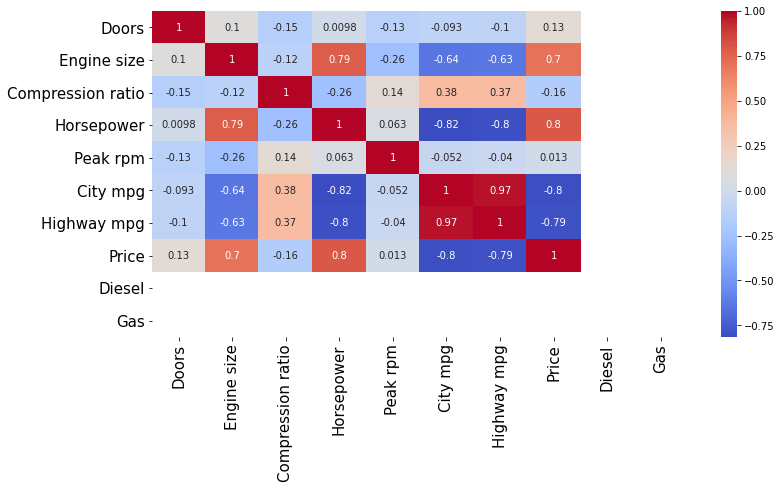

In [56]:
c= df.corr()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(c, cmap="coolwarm", annot=True)
ax.tick_params(labelsize=15)
ax.axis('tight')
c

## 7. Plot features.

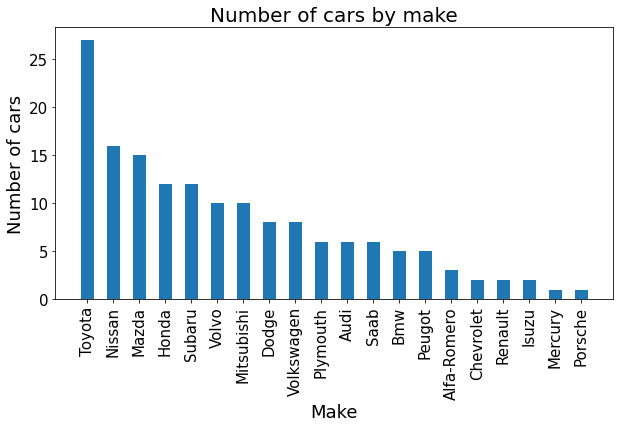

In [57]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.xlabel(r"Make", fontsize=18)
plt.ylabel(r"Number of cars", fontsize=18)
plt.title("Number of cars by make", fontsize=20)
plt.tick_params(labelsize=15)
plt.axis('tight');
# ax.grid(True)

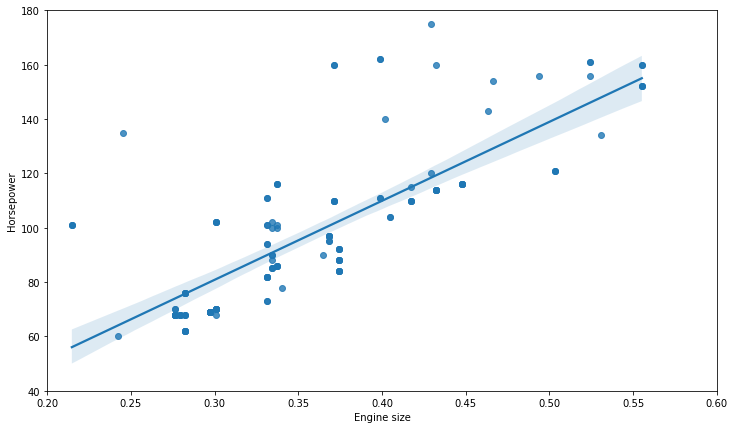

In [58]:
# Engine size as potential predictor variable of Horsepower
fig = plt.figure(figsize=(12,7))
sns.regplot(x="Engine size", y="Horsepower", data=df)
plt.xlim(0.2,0.6)
plt.ylim(40,180);

The Pearson Correlation Coefficient is a meassure of how linear is the relation (+ coeff + linear).

P-values is a meassure of how strong and statistically significant is the correlation (- P-value + strong the correlation).

In [59]:
pearson_coef, p_value = stats.pearsonr(df['Engine size'], df['Horsepower'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7867651357113649  with a P-value of P = 2.693287004940483e-34


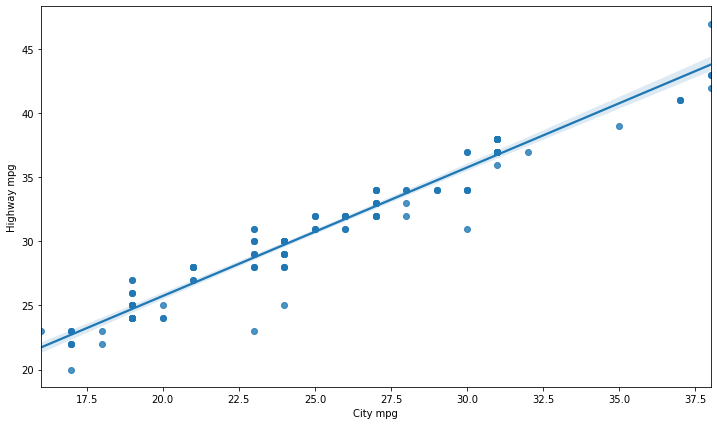

In [60]:
# City mpg as potential predictor variable of Highway mpg
fig = plt.figure(figsize=(12,7))
sns.regplot(x="City mpg", y="Highway mpg", data=df)
# plt.ylim(0,)

In [61]:
pearson_coef, p_value = stats.pearsonr(df['City mpg'], df['Highway mpg'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9721269677836317  with a P-value of P = 1.5045941435823202e-99


### Categorical variables

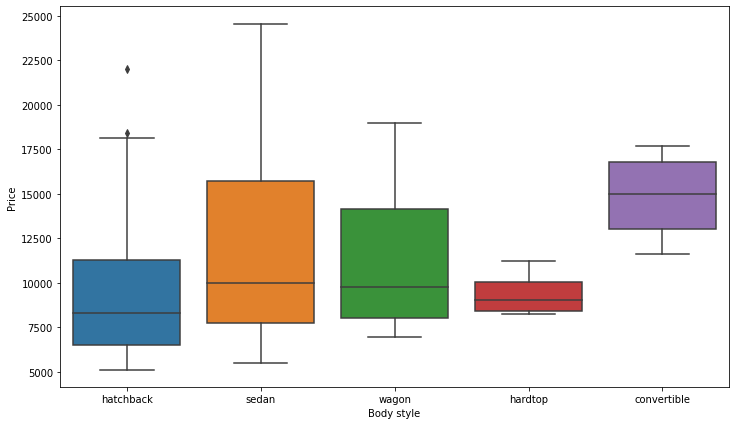

In [62]:
fig = plt.figure(figsize=(12,7))
sns.boxplot(x="Body style", y="Price", data=df)

### Value counts

In [63]:
df['Body style'].value_counts().to_frame()

,Body style
sedan,69
hatchback,58
wagon,22
convertible,4
hardtop,4


## 8. Group by.

In [64]:
# Group and shows mean of group
df.groupby(['Body style'],as_index=False).mean()

,Body style,Doors,Engine size,Compression ratio,Horsepower,Peak rpm,City mpg,Highway mpg,Price,Diesel,Gas
0,convertible,2.000000,0.394939,8.950000,107.000000,5075.000000,22.500000,28.250000,14814.750000,0.0,1.0
1,hardtop,2.000000,0.410276,9.325000,104.250000,4900.000000,25.750000,31.750000,9384.000000,0.0,1.0
2,hatchback,2.310345,0.335942,8.984828,93.948276,5236.637931,26.500000,32.344828,9667.862069,0.0,1.0
3,sedan,3.739130,0.364631,8.895652,98.666667,5184.057971,24.884058,30.724638,11916.724638,0.0,1.0
4,wagon,4.000000,0.363776,8.836364,97.136364,5128.409091,24.045455,29.227273,11368.909091,0.0,1.0


## 9. ANOVA: Analysis of Variance.

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant is our calculated score value.

In [65]:
group = df[['Body style', 'Price']].groupby(['Body style'])

# ANOVA
f_val, p_val = stats.f_oneway(group.get_group('sedan')['Price'], group.get_group('wagon')['Price'], group.get_group('hardtop')['Price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 0.6083835528565865 , P = 0.5464046178508866


## 10. Save clean data.

In [66]:
# Save data to file
df.to_csv("Data/Cars_ReCleanData.csv", index=False)

<h3>Read/Save Other Data Formats</h3>



| Data Formate  | Read           | Save             |
| ------------- |:--------------:| ----------------:|
| csv           | `pd.read_csv()`  |`df.to_csv()`     |
| json          | `pd.read_json()` |`df.to_json()`    |
| excel         | `pd.read_excel()`|`df.to_excel()`   |
| hdf           | `pd.read_hdf()`  |`df.to_hdf()`     |
| sql           | `pd.read_sql()`  |`df.to_sql()`     |
| ...           |   ...          |       ...        |